<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/time_series/Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

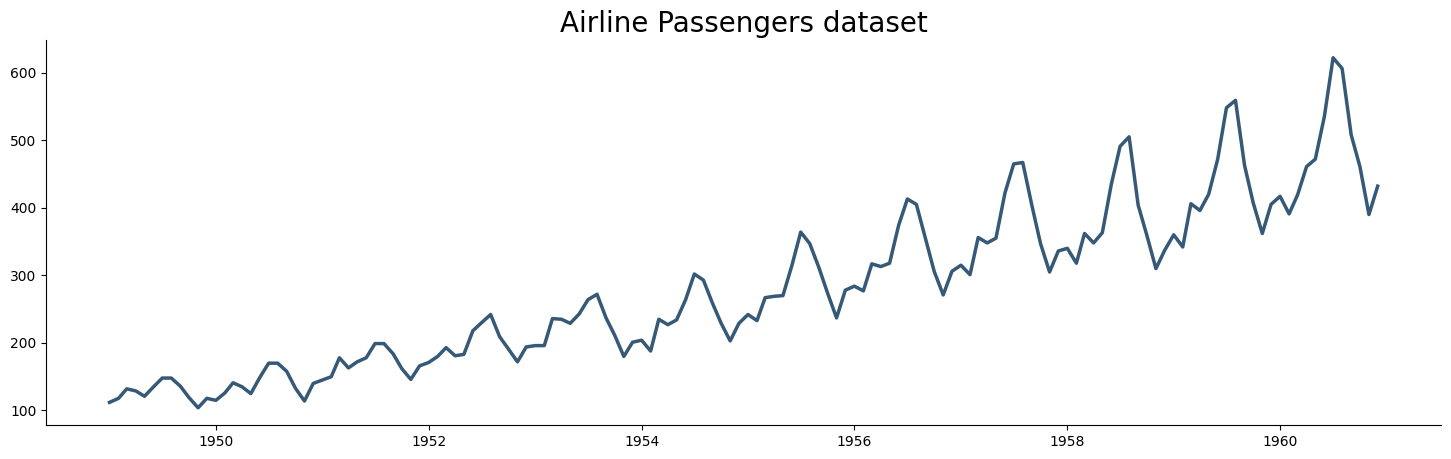

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

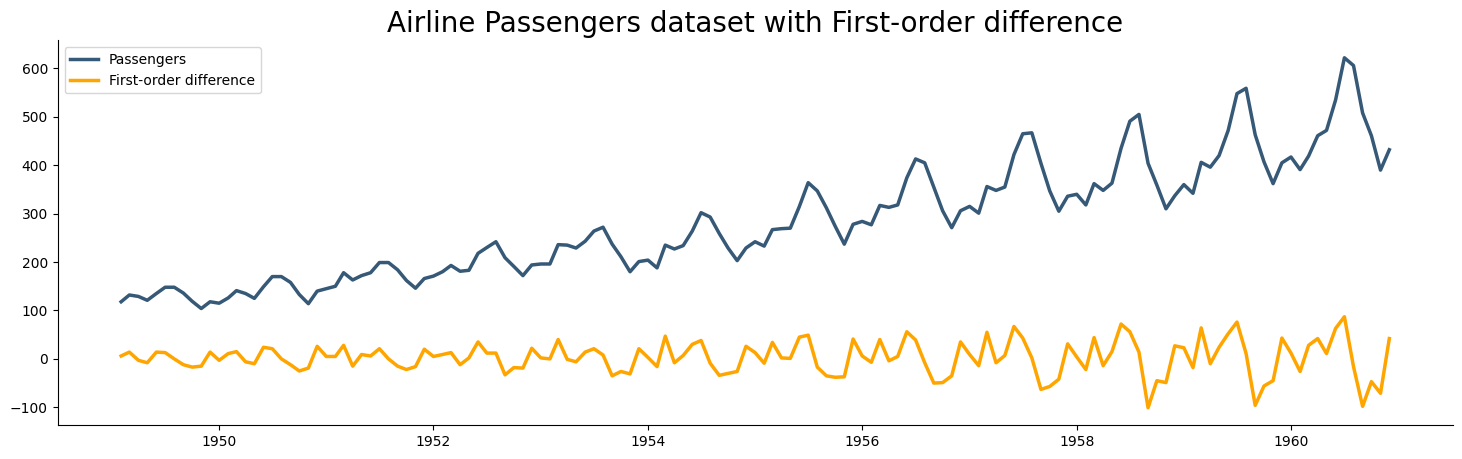

In [3]:
# First-order difference
df['Passengers_Diff'] = df['Passengers'].diff(periods=1)
df = df.dropna()

# Plot
plt.title('Airline Passengers dataset with First-order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='First-order difference', color='orange')
plt.legend();

In [7]:
# Calculate autocorrelation
acf_values = acf(df['Passengers_Diff'])
print(np.round(acf_values,2))

[ 1.    0.3  -0.1  -0.24 -0.3  -0.09 -0.08 -0.09 -0.29 -0.19 -0.1   0.28
  0.83  0.28 -0.11 -0.22 -0.23 -0.06 -0.07 -0.09 -0.3  -0.16]


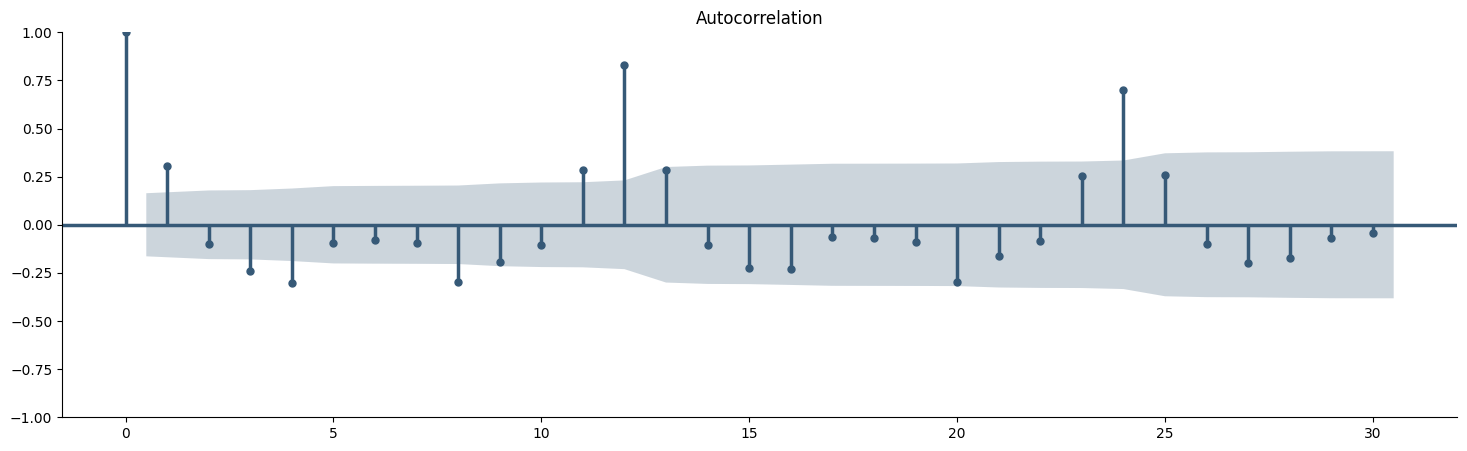

In [8]:
plot_acf(df['Passengers_Diff'], lags=30);

In [9]:
# Calculate partial autocorrelation
pacf_values = pacf(df['Passengers_Diff'])
print(np.round(pacf_values,2))

[ 1.    0.3  -0.22 -0.16 -0.23  0.01 -0.2  -0.16 -0.49 -0.28 -0.67 -0.42
  0.61 -0.05 -0.3   0.02  0.14  0.09 -0.12  0.01 -0.22 -0.12]


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


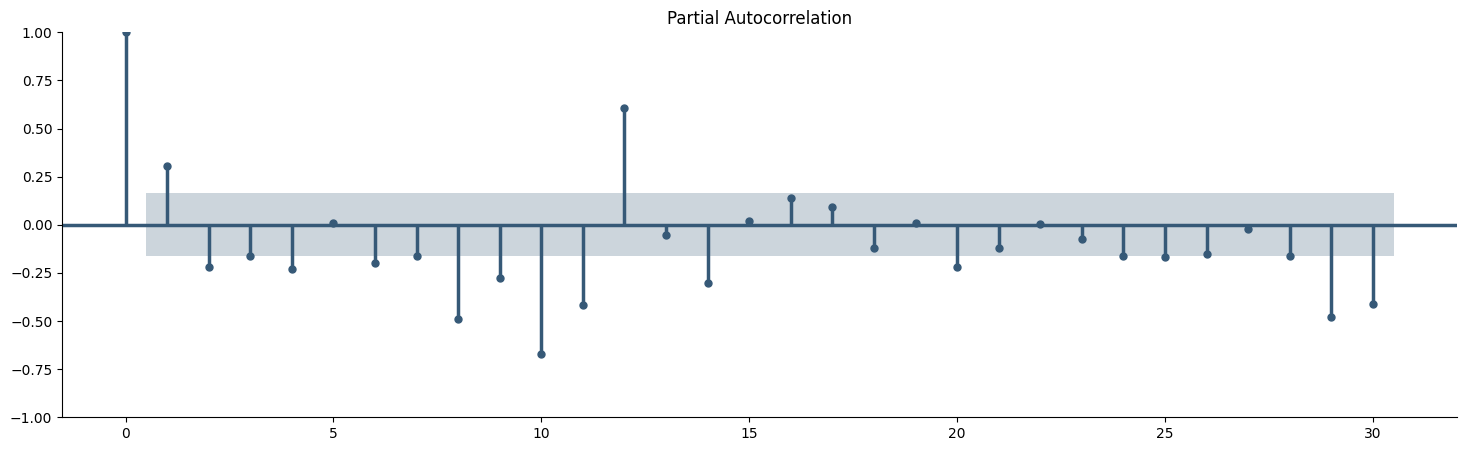

In [11]:
plot_pacf(df['Passengers_Diff'], lags=30);